# Linear Regression relating Goals a team scores in a game to if they win

In [154]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('./company-data.csv')
df.columns

Index(['Sales', 'Profit', 'Assets', 'Market_Value'], dtype='object')

In [156]:
cor_val_temp_StoMV = np.corrcoef(df.Sales,df.Market_Value)
cor_val_StoMV = cor_val_temp_StoMV[0,1]
print(cor_val_StoMV)

0.517937423123769


In [157]:
# extract X and Y for regression model
Y = df.Sales # dependent variable
X = df.Market_Value # independent variable

# make sure that constant term is included in linear regression model
X = sm.add_constant(X)

In [158]:
slr_model = sm.OLS(Y,X).fit()

In [159]:
sigma_Y = np.sqrt(np.var(Y))
sigma_X = np.sqrt(np.var(X.Market_Value))

b = cor_val_StoMV * (sigma_Y/sigma_X)
a = np.mean(Y) - (b*np.mean(X.Market_Value))
print(a)

18.69627354891406


In [160]:
# Pick 100 points equally spaced from min to max for the independent variable
X_set = np.linspace(X.Market_Value.min(), X.Market_Value.max(), 100)

# include the constant term in the linear regression model
X_prime = sm.add_constant(X_set)


In [161]:


Y_hat = slr_model.predict(X_prime)

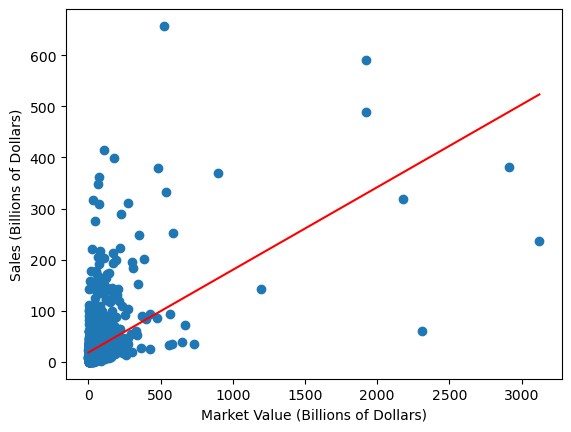

In [162]:
# plot the original data (scatter plot)
plt.scatter(X.Market_Value,Y)

# add labels to the plots
plt.xlabel("Market Value (Billions of Dollars)")
plt.ylabel("Sales (Billions of Dollars)")

# add the regression line
plt.plot(X_prime[:,1], Y_hat, 'red' )

In [163]:
# get the fitted values i.e. the predicted Y for the values of X that the 
# Simple Linear Regression model was built with
Y_fitted = slr_model.predict(X)

In [164]:
# get the mean of the residuals (should be close to 0)
np.mean(Y-Y_fitted)

6.3632812717746105e-15

In [165]:
# get the mean square error over the fitted values
np.mean((Y-Y_fitted)**2)

1587.0957288305458

# Correlation and regression relating Profit and Market Value

In [166]:
cor_val_temp_PtoMV = np.corrcoef(df.Profit,df.Market_Value)
cor_val_PtoMV = cor_val_temp_PtoMV[0,1]
print(cor_val_PtoMV)

0.8082029910230779


In [167]:
# extract X and Y for regression model
Y = df.Profit # dependent variable

# make sure that constant term is included in linear regression model
X = sm.add_constant(X)

In [168]:
slr_model = sm.OLS(Y,X).fit()

In [169]:
sigma_Y = np.sqrt(np.var(Y))
sigma_X = np.sqrt(np.var(X.Market_Value))

b = cor_val_StoMV * (sigma_Y/sigma_X)
a = np.mean(Y) - (b*np.mean(X.Market_Value))
print(a)

1.3008520687464116


In [170]:
# Pick 100 points equally spaced from min to max for the independent variable
X_set = np.linspace(X.Market_Value.min(), X.Market_Value.max(), 100)

# include the constant term in the linear regression model
X_prime = sm.add_constant(X_set)


In [171]:
Y_hat = slr_model.predict(X_prime)

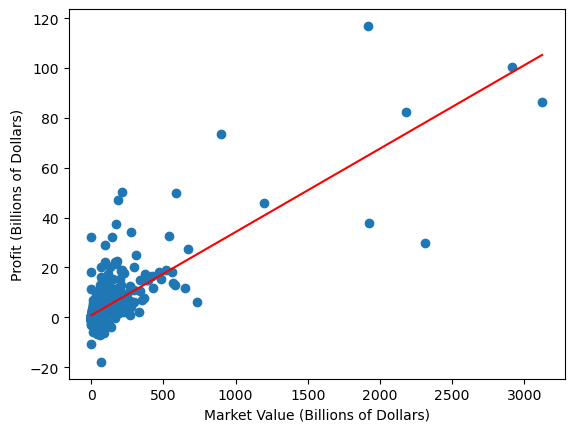

In [172]:
# plot the original data (scatter plot)
plt.scatter(X.Market_Value,Y)

# add labels to the plots
plt.xlabel("Market Value (Billions of Dollars)")
plt.ylabel("Profit (Billions of Dollars)")

# add the regression line
plt.plot(X_prime[:,1], Y_hat, 'red' )

In [173]:
# get the fitted values i.e. the predicted Y for the values of X that the 
# Simple Linear Regression model was built with
Y_fitted = slr_model.predict(X)

In [174]:
# get the mean of the residuals (should be close to 0)
np.mean(Y-Y_fitted)

9.090401816820872e-16

In [175]:
# get the mean square error over the fitted values
np.mean((Y-Y_fitted)**2)

13.245610623793441

# Correlation and regression relating Assets and Market Value

In [176]:
cor_val_temp_AtoMV = np.corrcoef(df.Assets,df.Market_Value)
cor_val_AtoMV = cor_val_temp_AtoMV[0,1]
print(cor_val_AtoMV)

0.14064702984727756


In [177]:
# extract X and Y for regression model
Y = df.Assets # dependent variable

# make sure that constant term is included in linear regression model
X = sm.add_constant(X)

In [178]:
slr_model = sm.OLS(Y,X).fit()

In [179]:
sigma_Y = np.sqrt(np.var(Y))
sigma_X = np.sqrt(np.var(X.Market_Value))

b = cor_val_StoMV * (sigma_Y/sigma_X)
a = np.mean(Y) - (b*np.mean(X.Market_Value))
print(a)

59.55247106845874


In [180]:
# Pick 100 points equally spaced from min to max for the independent variable
X_set = np.linspace(X.Market_Value.min(), X.Market_Value.max(), 100)

# include the constant term in the linear regression model
X_prime = sm.add_constant(X_set)

In [181]:
Y_hat = slr_model.predict(X_prime)

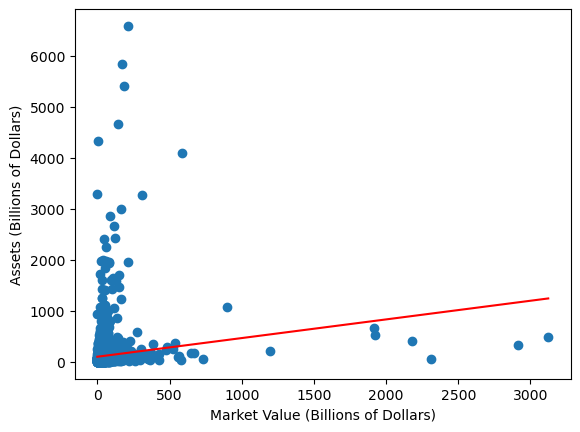

In [182]:
# plot the original data (scatter plot)
plt.scatter(X.Market_Value,Y)

# add labels to the plots
plt.xlabel("Market Value (Billions of Dollars)")
plt.ylabel("Assets (Billions of Dollars)")

# add the regression line
plt.plot(X_prime[:,1], Y_hat, 'red' )

In [183]:
# get the fitted values i.e. the predicted Y for the values of X that the 
# Simple Linear Regression model was built with
Y_fitted = slr_model.predict(X)

In [184]:
# get the mean of the residuals (should be close to 0)
np.mean(Y-Y_fitted)

-1.4544642906913395e-14

In [87]:
# get the mean square error over the fitted values
np.mean((Y-Y_fitted)**2)

147733.47572507482